### 1.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy
import os
import math

In [91]:
df = pd.read_csv('mental_health_digital_behavior_data.csv')
df.head()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7


In [92]:
# daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level
df['daily_screen_time_min'] = (df['daily_screen_time_min'] - df['daily_screen_time_min'].min()) / (df['daily_screen_time_min'].max() - df['daily_screen_time_min'].min())
df['num_app_switches'] = (df['num_app_switches'] - df['num_app_switches'].min()) / (df['num_app_switches'].max() - df['num_app_switches'].min())
df['sleep_hours'] = (df['sleep_hours'] - df['sleep_hours'].min()) / (df['sleep_hours'].max() - df['sleep_hours'].min())
df['notification_count'] = (df['notification_count'] - df['notification_count'].min()) / (df['notification_count'].max() - df['notification_count'].min())
df['social_media_time_min'] = (df['social_media_time_min'] - df['social_media_time_min'].min()) / (df['social_media_time_min'].max() - df['social_media_time_min'].min())
df['focus_score'] = (df['focus_score'] - df['focus_score'].min()) / (df['focus_score'].max() - df['focus_score'].min())
df['mood_score'] = (df['mood_score'] - df['mood_score'].min()) / (df['mood_score'].max() - df['mood_score'].min())
df['anxiety_level'] = (df['anxiety_level'] - df['anxiety_level'].min()) / (df['anxiety_level'].max() - df['anxiety_level'].min())


In [93]:
df_train_a, df_test_a = train_test_split(df, test_size=0.2, random_state=42)
df_train_a, df_val_a = train_test_split(df_train_a, test_size=0.25, random_state=42)

df_train_b, df_test_b = train_test_split(df, test_size=0.2, random_state=42)
df_train_b, df_val_b = train_test_split(df_train_b, test_size=0.125, random_state=42)

df_train_c, df_test_c = train_test_split(df, test_size=0.2, random_state=42)
df_val_c, df_test_c = train_test_split(df_test_c, test_size=0.5, random_state=42)

### 2.

In [94]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    total_cost = 0

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        total_cost += (f_wb - y[i]) ** 2
    total_cost /= 2 * m

    return total_cost

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += f_wb - y[i]
    dj_dw /= m
    dj_db /= m
        
    return dj_dw, dj_db

def batch_gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, delta, num_iters, verbose=True): 
    m = len(x)
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<1000000:
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        if verbose and i % math.ceil(num_iters/100) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
        if i > 0 and abs(J_history[-1] - J_history[-2]) < delta:
            print(f"Early stopping at iteration {i}")
            break

    return w, b, J_history, w_history

In [95]:
MINI_BATCH_SIZE = int(input("Enter mini-batch size: "))

In [96]:
def mini_batch_gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, delta, num_iters, verbose=True):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        for start in range(0, m, MINI_BATCH_SIZE):
            end = start + MINI_BATCH_SIZE
            x_batch = x[start:end]
            y_batch = y[start:end]

            dj_dw, dj_db = gradient_function(x_batch, y_batch, w, b)
            w = w - alpha * dj_dw
            b = b - alpha * dj_db

        cost = cost_function(x, y, w, b)
        J_history.append(cost)

        if verbose and i % max(1, math.ceil(num_iters/100)) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

        if i > 0 and abs(J_history[-1] - J_history[-2]) < delta:
            print(f"Early stopping at iteration {i}")
            break

    return w, b, J_history, w_history

In [97]:
def stochastic_gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, delta, num_iters, verbose=True):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for start in range(0, m):
            end = start + 1
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            dj_dw, dj_db = gradient_function(x_batch, y_batch, w, b)
            w = w - alpha * dj_dw
            b = b - alpha * dj_db

        cost = cost_function(x, y, w, b)
        J_history.append(cost)

        if verbose and i % max(1, math.ceil(num_iters/100)) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

        if i > 0 and abs(J_history[-1] - J_history[-2]) < delta:
            print(f"Early stopping at iteration {i}")
            break

    return w, b, J_history, w_history

In [98]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, delta, num_iters, verbose=True): 
    return batch_gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, delta, num_iters, verbose)

In [99]:
def predict(w0, w1, x):
    m = x.shape[0] 
    res = np.zeros(m)
    for i in range(m):
        res[i] = np.dot(w1, x[i]) + w0
    return res

def rss(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)


def r2_score(y_true, y_pred):
    ss_res = rss(y_true, y_pred)
    ss_tot = np.sum((y_true - y_true.mean())**2)
    return 1 - ss_res/ss_tot

In [100]:
alphas = {0.0001, 0.1}
deltas = {0.001, 0.01}

for i in range(3):
    for alpha in alphas:
        for delta in deltas:
            print(f"Training with split={'a' if i==0 else 'b' if i==1 else 'c'}, alpha={alpha}, delta={delta}")
            initial_w = np.random.rand(df_train_a.shape[1] - 1)
            initial_b = 0
            num_iters = 100000

            df_cur = df_train_a
            if i==1: df_cur = df_train_b
            elif i==2: df_cur = df_train_c
            x_train_a = df_cur.drop('digital_wellbeing_score', axis=1).to_numpy()
            y_train_a = df_cur['digital_wellbeing_score'].to_numpy()

            w, b, _, _ = gradient_descent(x_train_a, y_train_a, initial_w, initial_b,
                                                        compute_cost, compute_gradient,
                                                        alpha, delta, num_iters)

            df_val_cur = df_val_a
            if i==1: df_val_cur = df_val_b
            elif i==2: df_val_cur = df_val_c
            x_val_a = df_val_cur.drop('digital_wellbeing_score', axis=1).to_numpy()
            y_val_a = df_val_cur['digital_wellbeing_score'].to_numpy()
            val_predictions = predict(b, w, x_val_a)
            print(f'{val_predictions.shape}')
            print(f'{y_val_a.shape}')
            val_rmse = np.sqrt(np.mean((val_predictions - y_val_a) ** 2))
            print(f"Validation RMSE (alpha={alpha}, delta={delta}): {val_rmse}")

Training with split=a, alpha=0.1, delta=0.01
Iteration    0: Cost   615.14   
Early stopping at iteration 485
(100,)
(100,)
Validation RMSE (alpha=0.1, delta=0.01): 2.6628389087734607
Training with split=a, alpha=0.1, delta=0.001
Iteration    0: Cost   611.32   
Iteration 1000: Cost     1.49   
Early stopping at iteration 1479
(100,)
(100,)
Validation RMSE (alpha=0.1, delta=0.001): 1.244184310875484
Training with split=a, alpha=0.0001, delta=0.01
Iteration    0: Cost  1286.33   
Iteration 1000: Cost   694.81   
Iteration 2000: Cost   388.12   
Iteration 3000: Cost   228.99   
Iteration 4000: Cost   146.29   
Iteration 5000: Cost   103.18   
Iteration 6000: Cost    80.59   
Early stopping at iteration 6760
(100,)
(100,)
Validation RMSE (alpha=0.0001, delta=0.01): 11.721076934231498
Training with split=a, alpha=0.0001, delta=0.001
Iteration    0: Cost  1320.82   
Iteration 1000: Cost   711.83   
Iteration 2000: Cost   396.10   
Iteration 3000: Cost   232.29   
Iteration 4000: Cost   147.

In [101]:
# optimal {alpha, delta} for all train-test-splits seems to be {0.1, 0.001}
alpha = 0.1
delta = 0.001

Y = []
Y_pred = []

for i in range(3):
    print(f"Training with split={'a' if i==0 else 'b' if i==1 else 'c'}, alpha={alpha}, delta={delta}")
    initial_w = np.random.rand(df_train_a.shape[1] - 1)
    initial_b = 0
    num_iters = 10000

    df_cur = df_train_a
    if i==1: df_cur = df_train_b
    elif i==2: df_cur = df_train_c
    x_train_a = df_cur.drop('digital_wellbeing_score', axis=1).to_numpy()
    y_train_a = df_cur['digital_wellbeing_score'].to_numpy()

    w, b, _, _ = gradient_descent(x_train_a, y_train_a, initial_w, initial_b,
                                                        compute_cost, compute_gradient,
                                                        alpha, delta, num_iters)
    df_test_cur = df_test_a
    if i==1: df_test_cur = df_test_b
    elif i==2: df_test_cur = df_test_c
    x_test_a = df_test_cur.drop('digital_wellbeing_score', axis=1).to_numpy()
    y_test_a = df_test_cur['digital_wellbeing_score'].to_numpy()
    test_predictions = predict(b, w, x_test_a)
    Y.append(y_test_a)
    Y_pred.append(test_predictions)

Training with split=a, alpha=0.1, delta=0.001
Iteration    0: Cost   600.58   
Iteration  100: Cost    24.44   
Iteration  200: Cost    12.13   
Iteration  300: Cost     7.21   
Iteration  400: Cost     4.92   
Iteration  500: Cost     3.69   
Iteration  600: Cost     2.93   
Iteration  700: Cost     2.41   
Iteration  800: Cost     2.02   
Iteration  900: Cost     1.73   
Iteration 1000: Cost     1.49   
Iteration 1100: Cost     1.30   
Iteration 1200: Cost     1.14   
Iteration 1300: Cost     1.00   
Iteration 1400: Cost     0.88   
Early stopping at iteration 1479
Training with split=b, alpha=0.1, delta=0.001
Iteration    0: Cost   619.41   
Iteration  100: Cost    24.40   
Iteration  200: Cost    12.29   
Iteration  300: Cost     7.37   
Iteration  400: Cost     5.05   
Iteration  500: Cost     3.78   
Iteration  600: Cost     2.99   
Iteration  700: Cost     2.45   
Iteration  800: Cost     2.06   
Iteration  900: Cost     1.76   
Iteration 1000: Cost     1.51   
Iteration 1100: C

In [102]:
train_pcts = [0.6, 0.7, 0.8]
mrss = []

for i in range(3):
    y = Y[i]
    y_pred = Y_pred[i]
    train_pct = train_pcts[i]

    rss_score = rss(y, y_pred)
    mean_rss = rss_score/len(y)
    mrss.append(mean_rss)

In [ ]:
PLOTSDIR = 'plots/'
# plt.scatter(train_pcts, mrss, color='blue', marker='x')
# plt.xlabel('train percent')
# plt.ylabel('mean rss')
# plt.title('Stochastic GD Train pct vs. Mean RSS')
# plt.savefig(PLOTSDIR + 'stochastic_gd_train_pct_vs_mrss.png')
# plt.show()

### 2.g, 2.h

In [104]:
# best train_test_split seems to be 80:10:10
x_train = df_train_c.drop('digital_wellbeing_score', axis=1).to_numpy()
y_train = df_train_c['digital_wellbeing_score'].to_numpy()

# implementing descriptive gradient descent functions with mean-rss tracking

In [107]:
def batch_gradient_descent_desc(x, y, w_in, b_in, cost_function, gradient_function, alpha, delta, num_iters, verbose=True): 
    m = len(x)
    
    J_history = []
    w_history = []
    m_rss = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<1000000:
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        if verbose and i % math.ceil(num_iters/1000) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
            y_pred = predict(b, w, x)
            rss_score = rss(y, y_pred)
            mean_rss = rss_score/len(y)
            print(f"Mean RSS: {mean_rss}")
            m_rss.append(mean_rss)
        
        if i > 0 and abs(J_history[-1] - J_history[-2]) < delta:
            print(f"Early stopping at iteration {i}")
            break

    return w, b, J_history, w_history, m_rss

def mini_batch_gradient_descent_desc(x, y, w_in, b_in, cost_function, gradient_function, alpha, delta, num_iters, verbose=True):
    m = len(x)
    J_history = []
    w_history = []
    m_rss = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        for start in range(0, m, MINI_BATCH_SIZE):
            end = start + MINI_BATCH_SIZE
            x_batch = x[start:end]
            y_batch = y[start:end]

            dj_dw, dj_db = gradient_function(x_batch, y_batch, w, b)
            w = w - alpha * dj_dw
            b = b - alpha * dj_db

        cost = cost_function(x, y, w, b)
        J_history.append(cost)

        if verbose and i % max(1, math.ceil(num_iters/1000)) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
            y_pred = predict(b, w, x)
            rss_score = rss(y, y_pred)
            mean_rss = rss_score/len(y)
            print(f"Mean RSS: {mean_rss}")
            m_rss.append(mean_rss)

        if i > 0 and abs(J_history[-1] - J_history[-2]) < delta:
            print(f"Early stopping at iteration {i}")
            break

    return w, b, J_history, w_history, m_rss

def stochastic_gradient_descent_desc(x, y, w_in, b_in, cost_function, gradient_function, alpha, delta, num_iters, verbose=True):
    m = len(x)
    J_history = []
    w_history = []
    m_rss = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for start in range(0, m):
            end = start + 1
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            dj_dw, dj_db = gradient_function(x_batch, y_batch, w, b)
            w = w - alpha * dj_dw
            b = b - alpha * dj_db

        cost = cost_function(x, y, w, b)
        J_history.append(cost)

        if verbose and i % max(1, math.ceil(num_iters/1000)) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
            y_pred = predict(b, w, x)
            rss_score = rss(y, y_pred)
            mean_rss = rss_score/len(y)
            print(f"Mean RSS: {mean_rss}")
            m_rss.append(mean_rss)

        if i > 0 and abs(J_history[-1] - J_history[-2]) < delta:
            print(f"Early stopping at iteration {i}")
            break

    return w, b, J_history, w_history, m_rss

In [108]:
alpha = 0.1
delta = 0.001
initial_w = np.random.rand(df_train_a.shape[1] - 1)
initial_b = 0
num_iters = 10000

w_bgd, b_bgd, _, _,  m_rss_bgd= batch_gradient_descent_desc(x_train, y_train, initial_w, initial_b,
                                                        compute_cost, compute_gradient,
                                                        alpha, delta, num_iters)

w_mgd, b_mgd, _, _,  m_rss_mgd= mini_batch_gradient_descent_desc(x_train, y_train, initial_w, initial_b,
                                                        compute_cost, compute_gradient,
                                                        alpha, delta, num_iters)

w_sgd, b_sgd, _, _,  m_rss_sgd= stochastic_gradient_descent_desc(x_train, y_train, initial_w, initial_b,
                                                        compute_cost, compute_gradient,
                                                        alpha, delta, num_iters)

Iteration    0: Cost   602.20   
Mean RSS: 1204.406776518179
Iteration   10: Cost    53.27   
Mean RSS: 106.5328081019592
Iteration   20: Cost    48.23   
Mean RSS: 96.46623964680252
Iteration   30: Cost    43.91   
Mean RSS: 87.828847367413
Iteration   40: Cost    40.06   
Mean RSS: 80.12009349505917
Iteration   50: Cost    36.62   
Mean RSS: 73.23273523617621
Iteration   60: Cost    33.54   
Mean RSS: 67.07243726994695
Iteration   70: Cost    30.78   
Mean RSS: 61.55608931744291
Iteration   80: Cost    28.31   
Mean RSS: 56.61044565807476
Iteration   90: Cost    26.09   
Mean RSS: 52.17093122929273
Iteration  100: Cost    24.09   
Mean RSS: 48.180593761599184
Iteration  110: Cost    22.29   
Mean RSS: 44.589183979192605
Iteration  120: Cost    20.68   
Mean RSS: 41.35234811543966
Iteration  130: Cost    19.22   
Mean RSS: 38.43091893668458
Iteration  140: Cost    17.90   
Mean RSS: 35.79029317168125
Iteration  150: Cost    16.70   
Mean RSS: 33.399884736972204
Iteration  160: Cost   

In [122]:
epochs_bgd = []
epochs_mgd = []
epochs_sgd = []

ctr = 0
for _ in m_rss_bgd:
    epochs_bgd.append(ctr)
    ctr += 10
ctr = 0
for _ in m_rss_mgd:
    epochs_mgd.append(ctr)
    ctr += 10
ctr = 0
for _ in m_rss_sgd:
    epochs_sgd.append(ctr)
    ctr += 10

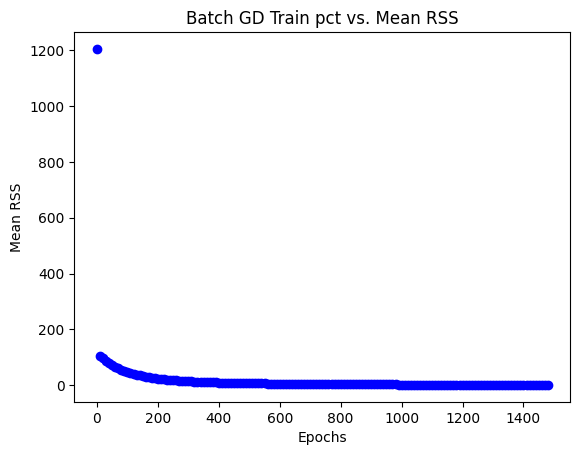

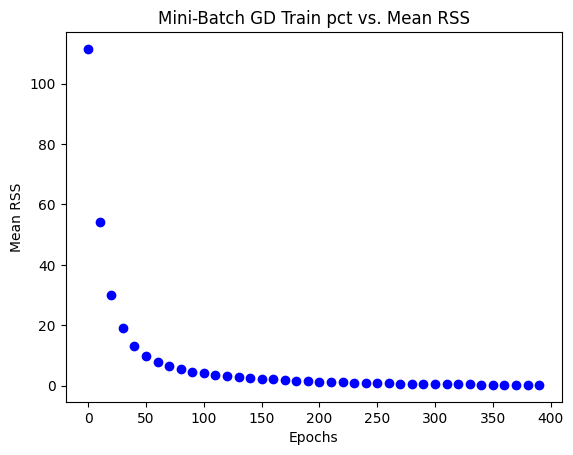

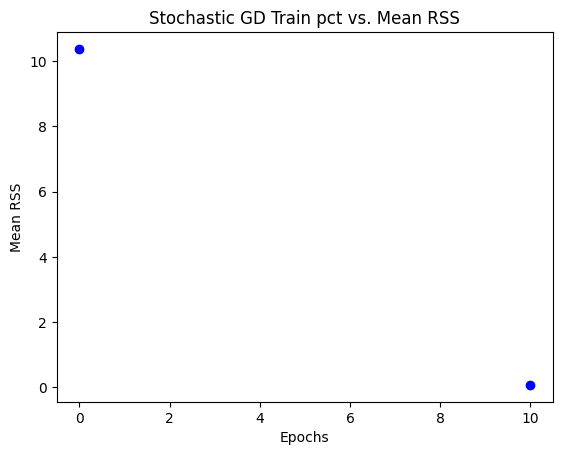

In [123]:
plt.scatter(epochs_bgd, m_rss_bgd, color='blue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean RSS')
plt.title('Batch GD Train pct vs. Mean RSS')
plt.savefig(PLOTSDIR + 'batch_gd_training_epochs_vs_mrss.png')
plt.show()

plt.scatter(epochs_mgd, m_rss_mgd, color='blue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean RSS')
plt.title('Mini-Batch GD Train pct vs. Mean RSS')
plt.savefig(PLOTSDIR + 'mini_batch_gd_training_epochs_vs_mrss.png')
plt.show()

plt.scatter(epochs_sgd, m_rss_sgd, color='blue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean RSS')
plt.title('Stochastic GD Train pct vs. Mean RSS')
plt.savefig(PLOTSDIR + 'stochastic_gd_training_epochs_vs_mrss.png')
plt.show()